<a href="https://colab.research.google.com/github/ShaominXu/Image-and-video-processing-labs/blob/main/Color%20and%20Constract%20Manipulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CA01

NetID: sx2311

Name: Shaomin Xu

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Problem1

### Reading image

<class 'numpy.ndarray'>
(512, 768, 3)


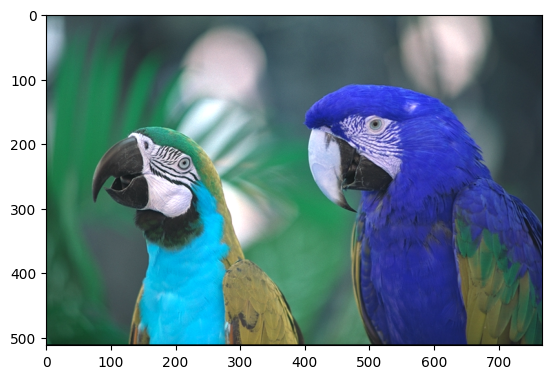

In [ ]:
img = cv2.imread("color image.png")
print(type(img))
print(img.shape)
plt.figure()
plt.imshow(img)
# The color of the image being displayed here is not the same as original image
# This is because cv2 reads image in BGR, but plt.imshow() display image in RGB

### Display image in RGB

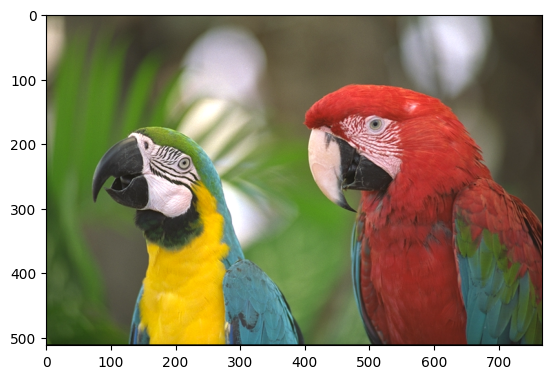

In [ ]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)   #converts color space from BGR to RGB
plt.figure()
plt.imshow(img_rgb)

RGB Image is the original image with all three color channels combined and represents the full color information in the image.

Text(0.5, 1.0, 'B')

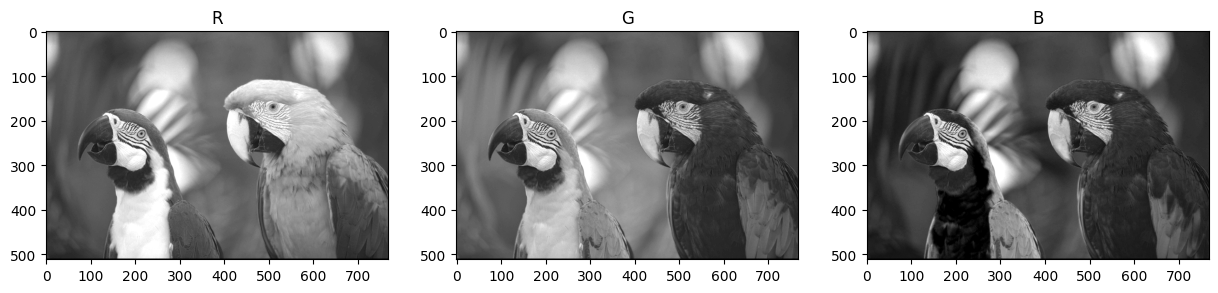

In [ ]:
# Split the image into its R, G, and B channels
r_channel, g_channel, b_channel = cv2.split(img_rgb)
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
# Display R channel
plt.imshow(r_channel, cmap = 'gray')     # 'gray' is to show a single-channel image in grayscale
plt.title('R')
# Display G channel
plt.subplot(1,3,2)
plt.imshow(g_channel, cmap = 'gray')
plt.title('G')
# Display B channel
plt.subplot(1,3,3)
plt.imshow(b_channel, cmap = 'gray')
plt.title('B')

Red pixels are brighter in R channels than in G and B channels.

Green pixels are brighter in G channels than in R and B channels.

Blue pixels are brighter in B channels than in R and G channels.

### Display image in HSV

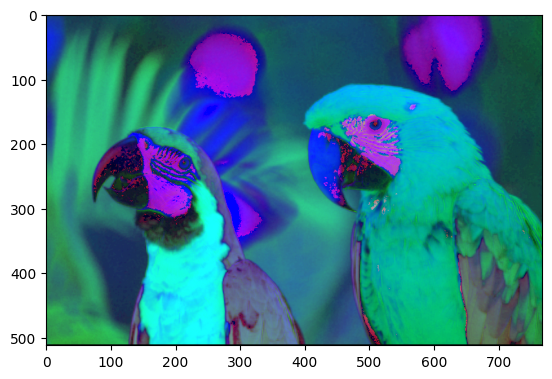

In [ ]:
img_hsv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)
plt.figure()
plt.imshow(img_hsv)

HSV image is different from RGB image in color representation.

Text(0.5, 1.0, 'V')

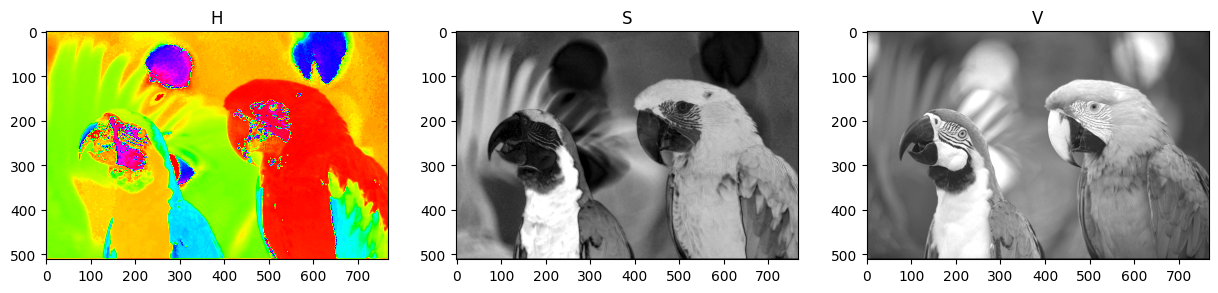

In [ ]:
# Split the HSV image into its H, S, and V channels
h_channel, s_channel, v_channel = cv2.split(img_hsv)
plt.figure(figsize = (15,15))
# Display H channel
plt.subplot(1,3,1)
plt.imshow(h_channel, cmap = 'hsv')
plt.title('H')
# Display S channel
plt.subplot(1,3,2)
plt.imshow(s_channel, cmap = 'gray')
plt.title('S')
# Display V channel
plt.subplot(1,3,3)
plt.imshow(v_channel, cmap = 'gray')
plt.title('V')

The H channel represents the color tone information in the image.

The S channel represents the color purity in the image. Higher values indicate more vivid colors, while lower values indicate shades of gray.

The V channel represents the brightness or luminance of the image. Higher values indicate brighter areas, while lower values indicate darker areas.

### Use mask

Text(0.5, 1.0, 'Blue Pixels')

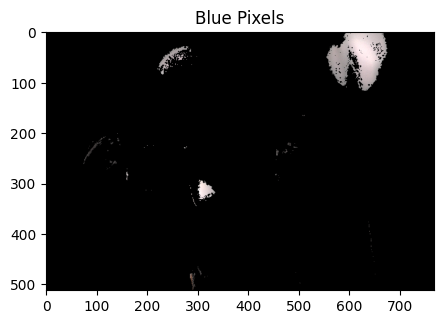

In [ ]:
# Define the lower and upper bounds for blue hue
lower_blue = np.array([110, 0, 0])  # Lower bound for blue hue in HSV
upper_blue = np.array([130, 255, 255])  # Upper bound for blue hue in HSV

# Create a binary mask for blue pixels
blue_mask = cv2.inRange(img_hsv, lower_blue, upper_blue)

# Apply the binary mask to the original image to display only blue pixels
blue_pixels = cv2.bitwise_and(img_rgb, img_rgb, mask=blue_mask)

# Convert the blue pixels image to RGB for display
blue_pixels_rgb = cv2.cvtColor(blue_pixels, cv2.COLOR_BGR2RGB)

# Display the blue pixels on a black background
plt.figure(figsize=(5, 5))
plt.imshow(blue_pixels_rgb)
plt.title('Blue Pixels')

## Problem 2

### Load image

In [ ]:
img = cv2.imread("low_contrast_image.png", cv2.IMREAD_GRAYSCALE)
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(321, 481)


### Display image

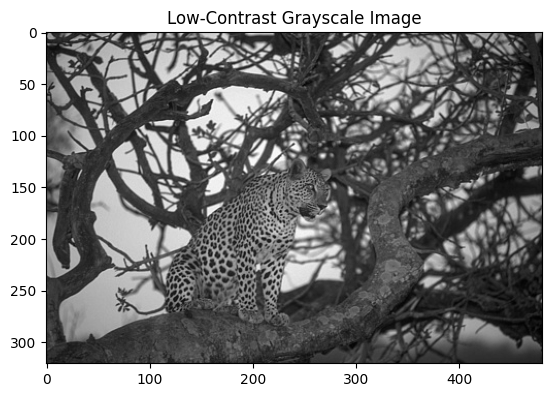

In [ ]:
plt.imshow(img, cmap='gray')
plt.title('Low-Contrast Grayscale Image')
plt.show()

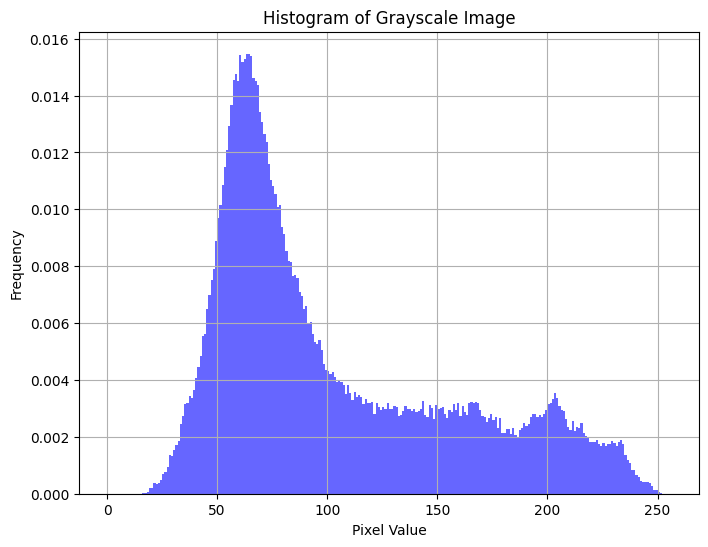

In [ ]:
# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(img.ravel(), bins=256, range=[0, 256], density=True, color='b', alpha=0.6)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Grayscale Image')
plt.grid()
plt.show()

A narrow or concentrated histogram typically corresponds to a low-contrast image, while a broader histogram with peaks at the extremes suggests a high-contrast image.

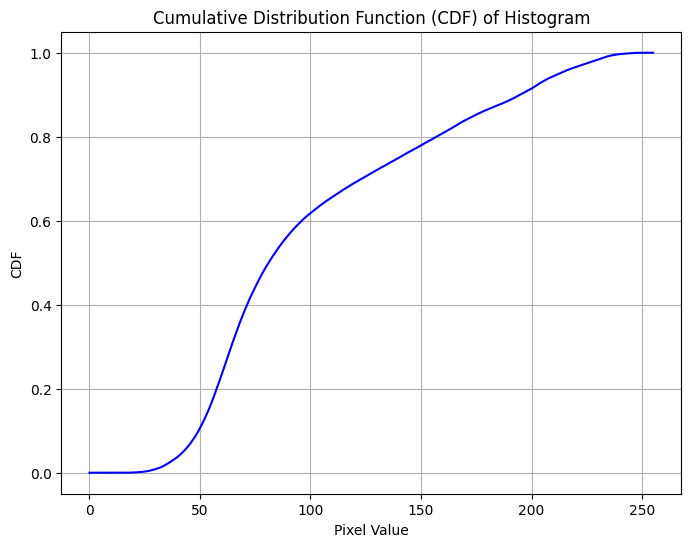

In [ ]:
# Calculate the CDF
cdf = hist.cumsum() / hist.sum()

# Plot the CDF
plt.figure(figsize=(8, 6))
plt.plot(cdf, color='b')
plt.xlabel('Pixel Value')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Histogram')
plt.grid()
plt.show()

The CDF maps gray level between 50 and 100 to a broader range. Therefore, it is an appropriate equalization.

Text(0.5, 1.0, 'Equalized Image')

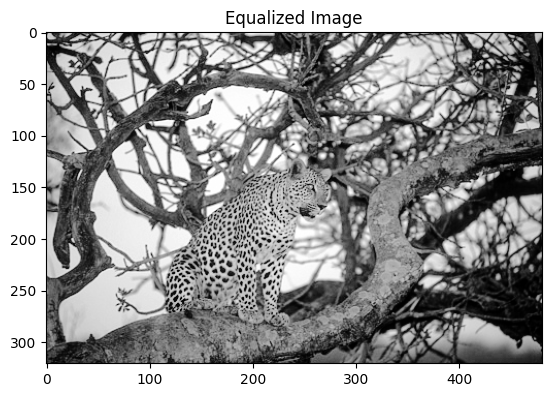

In [ ]:
# Normalize the CDF to range [0, 255]
cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())

# Use the CDF as a lookup table to map pixel values to their equalized values
equalized_image = cdf_normalized[img]

# Calculate the histogram of the transformed image
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# transformed image
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")

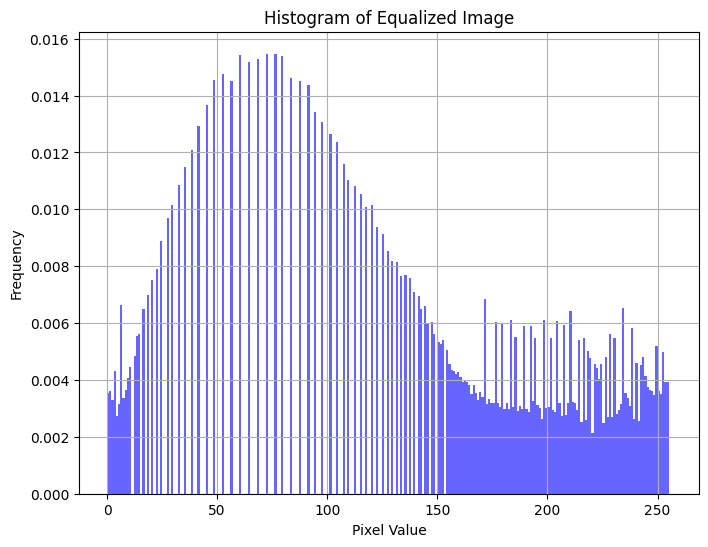

In [ ]:
# Histogram of the Transformed Image
plt.figure(figsize=(8, 6))
plt.hist(equalized_image.ravel(), bins=256, range=[0, 256], density=True, color='b', alpha=0.6)
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid()

The image's histogram has been equalised and the image's contrast has been enhanced.